# Interactive 3-D Visualization

In [1]:
# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Programs\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Loading an example geomodel

In [2]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'

geo_model = gp.create_data('viz_3d',
                           [0, 2000, 0, 2000, 0, 1600],
                           [50, 50, 50],
                           path_o=data_path + "data/input_data/lisa_models/foliations" + str(7) + ".csv",
                           path_i=data_path + "data/input_data/lisa_models/interfaces" + str(7) + ".csv"
                           )

gp.map_stack_to_surfaces(
    geo_model,
    {"Fault_1": 'Fault_1', "Fault_2": 'Fault_2',
     "Strat_Series": ('Sandstone', 'Siltstone', 'Shale', 'Sandstone_2', 'Schist', 'Gneiss')}
)

geo_model.set_is_fault(['Fault_1', 'Fault_2'])
geo_model.set_topography()

gp.set_interpolator(geo_model)
gp.compute_model(geo_model, compute_mesh=True)

Active grids: ['regular']


C:\Programs\Anaconda3\lib\site-packages\gempy\core\data_modules\geometric_data.py:537: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


Fault colors changed. If you do not like this behavior, set change_color to False.
[1280. 1600.]
Active grids: ['regular' 'topography']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!
Kriging values: 
                         values
range              3249.615362
$C_o$            251428.571429
drift equations   [3, 3, 3, 3]


C:\Programs\Anaconda3\lib\site-packages\gempy\core\solution.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.geological_map = np.array(



Lithology ids 
  [9. 9. 9. ... 3. 3. 3.] 

## Basic plotting API

### Data plot

In [ ]:
gp.plot_3d(geo_model, show_surfaces=False, notebook=True)

C:\Programs\Anaconda3\lib\site-packages\pyvista\plotting\plotting.py:1354: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)
ERROR:root:failed to get wglChoosePixelFormatARB
ERROR:root:failed to get valid pixel format.


### Geomodel plot

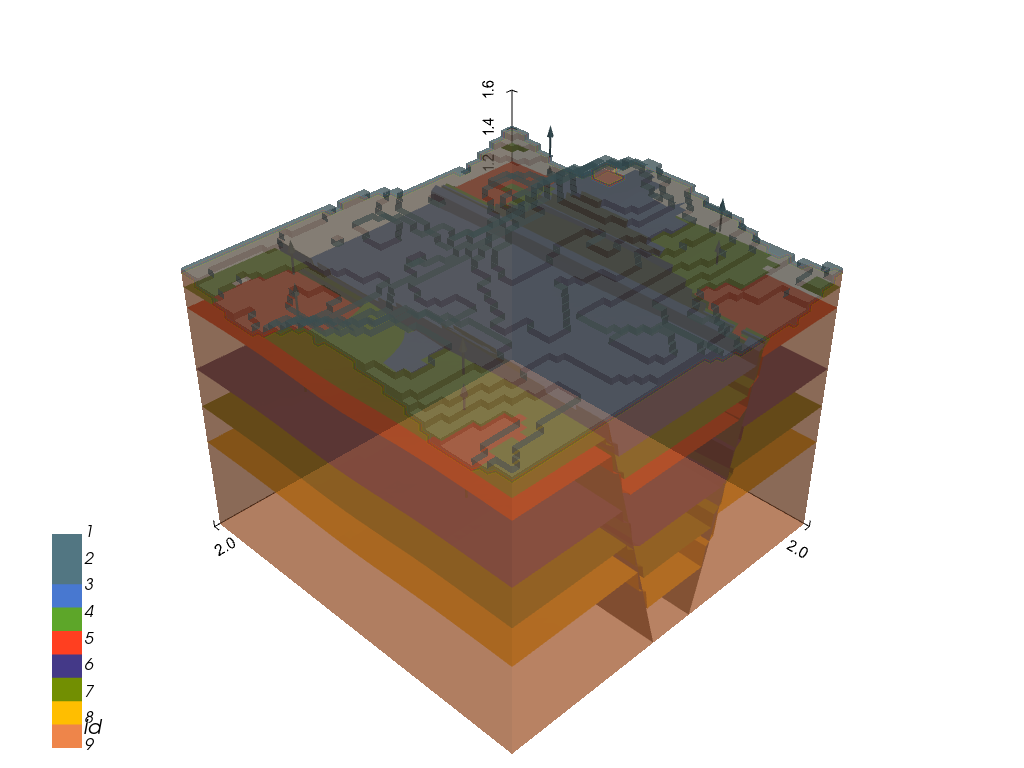

In [4]:
gp.plot_3d(geo_model, notebook=True)

### Interactive plot

Passing the `notebook=False` keyword argument will run the pyvista visualization in an external window, allowing for interactivity:

In [5]:
gp.plot_3d(geo_model, notebook=False)

## Granular 3-D Visualization

### Plotting surfaces

In [6]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Fault_1,Fault_1,1,#527682,1
1,Fault_2,Fault_2,1,#527682,2
7,Sandstone,Strat_Series,1,#4878d0,3
6,Siltstone,Strat_Series,2,#5DA629,4
5,Shale,Strat_Series,3,#ff3f20,5
4,Sandstone_2,Strat_Series,4,#443988,6
3,Schist,Strat_Series,5,#728f02,7
2,Gneiss,Strat_Series,6,#ffbe00,8
8,basement,Basement,1,#ee854a,9


In [7]:
gpv = gp.plot_3d(geo_model, show_data=False, show_results=False, plotter_type='background')

In [8]:
# Plotting all surfaces...
gpv.plot_surfaces()

{'Fault_1': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090C6A6490) at 0x0000020960898DC0>,
 'Fault_2': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090C6A7290) at 0x0000020960006040>,
 'Sandstone': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090C693290) at 0x0000020960006160>,
 'Siltstone': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090C69CC90) at 0x0000020963F6BF40>,
 'Shale': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090E9C5AA0) at 0x0000020963F6BE20>,
 'Sandstone_2': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090E9C40A0) at 0x0000020964851B80>,
 'Schist': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090E9C4CA0) at 0x00000209648513A0>,
 'Gneiss': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090E9C98A0) at 0x0000020964851B20>}

In [9]:
# ... masked by topography
gpv.plot_topography()

<vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090E9C5CA0) at 0x00000209541BF460>

In [10]:
# Just few surfaces
gpv.plot_surfaces(['Siltstone', 'Gneiss'])

{'Fault_1': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090C6A6490) at 0x0000020960898DC0>,
 'Fault_2': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090C6A7290) at 0x0000020960006040>,
 'Sandstone': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090C693290) at 0x0000020960006160>,
 'Siltstone': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090E9BD0A0) at 0x0000020957FF3520>,
 'Shale': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090E9C5AA0) at 0x0000020963F6BE20>,
 'Sandstone_2': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090E9C40A0) at 0x0000020964851B80>,
 'Schist': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090E9C4CA0) at 0x00000209648513A0>,
 'Gneiss': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090E9BB4A0) at 0x0000020964851D60>,
 'topography': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x000002090E9C5CA0) at 0x00000209541BF460>,
 'topography_cont': <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor

### Plotting individual surfaces

In [11]:
gpv.plot_surfaces(["Fault_1"])
gpv.plot_surfaces(["Shale"], clear=False)

{'Fault_1': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874B0CEBE0,
 'Fault_2': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874B0CEC40,
 'Sandstone': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874B0CEFA0,
 'Siltstone': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874A4795E0,
 'Shale': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874B2936A0,
 'Sandstone_2': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874AA04B20,
 'Schist': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874AA04A00,
 'Gneiss': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874AA04820,
 'topography': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874B293D60,
 'topography_cont': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874B0CEA60}

### Plotting input data

In [12]:
gpv.plot_surface_points()
gpv.plot_orientations()

(vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874B0CE160

In [13]:
mesh = gpv.surface_points_mesh
mesh

PolyData (0x1874a479e20)
  N Cells:	22
  N Points:	22
  X Bounds:	2.500e+02, 1.750e+03
  Y Bounds:	5.000e+02, 1.500e+03
  Z Bounds:	3.000e+02, 1.500e+03
  N Arrays:	1

In [14]:
mesh.points[:, -1]

pyvista_ndarray([ 500.,  500.,  500.,  500., 1500., 1200., 1500., 1300.,
                 1300., 1100., 1200., 1200., 1000.,  900.,  900.,  700.,
                  700.,  700.,  500.,  300.,  500.,  500.])

In [15]:
mesh.n_arrays

1

### Plot structured grids

In [16]:
gpv.plot_structured_grid("scalar", series = 'Strat_Series')

C:\Users\HP\anaconda3\lib\site-packages\pyvista\plotting\plotting.py:1354: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)


[UnstructuredGrid (0x1874a55d5e0)
   N Cells:	109523
   N Points:	117296
   X Bounds:	2.000e+01, 1.980e+03
   Y Bounds:	2.000e+01, 1.980e+03
   Z Bounds:	1.600e+01, 1.584e+03
   N Arrays:	4,
 'viridis']

### Interactive Block with cross sections

In [17]:
gp.plot.plot_interactive_3d(geo_model, show_topography=True)

## Interactive Plotting: Drag and drop

GemPy supports interactive plotting, meaning that you can drag & drop the input data and GemPy will update the geomodel live. This does not work in the static notebook plotter, but instead you have to pass the `notebook=False` argument to open an interactive plotting window. When running the next cell you can freely move the surface points (spheres) and orientations (arrows) of the Shale horizon and see how it updates the model. 

**Note**: Everytime you move a data point, GemPy will recompute the geomodel. This works best whe running GemPy on a dedicated graphics card (GPU). 

In [18]:
gpv = gp.plot_3d(geo_model, show_data=False, show_results=False, plotter_type='background')
gpv.plot_surface_points()
gpv.plot_orientations()
gpv.plot_surfaces()

{'Fault_1': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874A569700,
 'Fault_2': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874A569940,
 'Sandstone': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874A571880,
 'Siltstone': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874A571520,
 'Shale': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874B0CE2E0,
 'Sandstone_2': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874AA040A0,
 'Schist': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874AA04100,
 'Gneiss': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001874AA04D00}

In [ ]:
gpv.toggle_live_updating()

Now if you move the data the model updates!

To go back to static models:

In [ ]:
gpv.toggle_live_updating()

## Interactive Plotting: Programatically

If the model is in live_updating model. It is also possible to change the model by passing the plotting object to the typical methods:

In [ ]:
gpv.live_updating = True
gpv.plot_surface_points()
gpv.plot_orientations()

In [ ]:
geo_model.modify_surface_points(0, X=-100, plot_object=gpv)

In [ ]:
geo_model.add_surface_points(-200, 1500, 600, 'Schist', plot_object=gpv)

In [ ]:
geo_model.delete_surface_points(22, plot_object=gpv)